<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/N2_2B_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [326]:
dados = pd.read_excel('/content/titanic_reduced_database.xlsx')
dados.head()

,id_passageiro,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,numero_passagem,valor_passagem,id_cabine,local_de_embarque
0,1,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [327]:
#Substituir sexo por numeros
sobrevivente_replace = { 
    'nao' : 0,
    'sim': 1
}
sexo_replace = { 
    'female':0,
    'male': 1
}
embarque_replace = { 
    'S': 0,
    'C': 1,
    'Q': 2
}

In [328]:
dados['local_de_embarque'].value_counts()

S    644
C    168
Q     77
Name: local_de_embarque, dtype: int64

In [329]:
dados['sobrevivente'].replace(sobrevivente_replace, inplace = True)
dados['sexo'].replace(sexo_replace, inplace = True)
dados['local_de_embarque'].replace(embarque_replace, inplace = True)

In [330]:
x = dados.drop('sobrevivente', axis='columns')
y = dados['sobrevivente']

In [331]:
x.describe()

,id_passageiro,classe_da_passagem,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,local_de_embarque
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02,889.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,1.271697e+05,0.362205
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,4.112720e+05,0.636157
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000e+00,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,1.445000e+01,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,7.100000e+01,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,7.895800e+04,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,5.123292e+06,2.000000


In [332]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   classe_da_passagem        891 non-null    int64  
 2   nome_passageiro           891 non-null    object 
 3   sexo                      891 non-null    int64  
 4   idade                     714 non-null    float64
 5   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 6   pais_filhos_a_bordo       891 non-null    int64  
 7   numero_passagem           891 non-null    object 
 8   valor_passagem            891 non-null    float64
 9   id_cabine                 204 non-null    object 
 10  local_de_embarque         889 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [333]:
sobreviveu = dados.query("sobrevivente == 1")
morreu = dados.query("sobrevivente == 0")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0292750810>]],
      dtype=object)

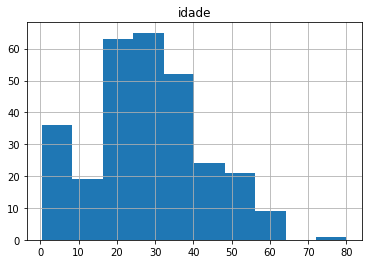

In [334]:
#Idade dos que sobreviveram
sobreviveu.hist('idade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a7fb9d90>]],
      dtype=object)

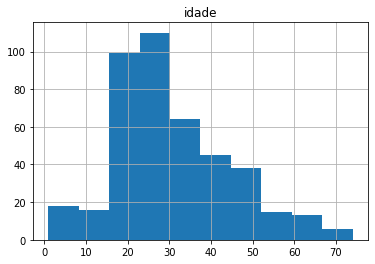

In [335]:
#Idade dos que morreram
morreu.hist('idade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a7fa4110>]],
      dtype=object)

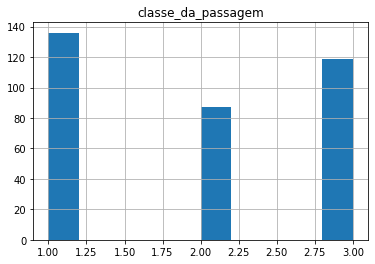

In [336]:
#classe dos que sobreviveram
sobreviveu.hist('classe_da_passagem')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a9933e50>]],
      dtype=object)

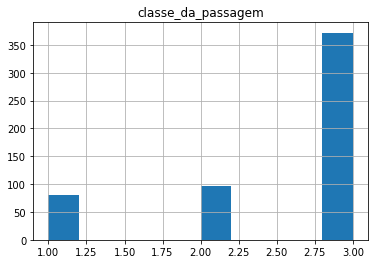

In [337]:
#classe dos que sobreviveram
morreu.hist('classe_da_passagem')

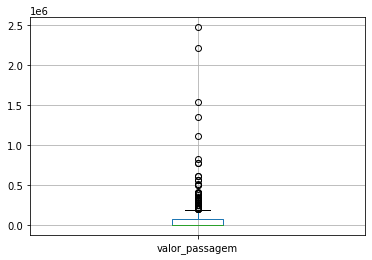

In [338]:
#Valor da passagem de quem morreu
morreu.boxplot("valor_passagem")

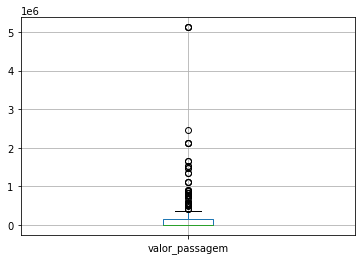

In [339]:
#Valor da passagem de quem sobreviveu
sobreviveu.boxplot("valor_passagem")

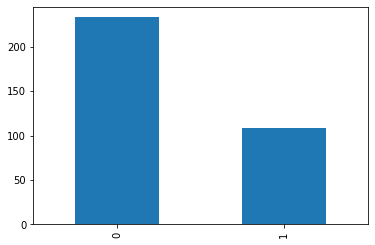

In [340]:
#Sexo dos sobreviventes
sobreviveu['sexo'].value_counts().plot.bar()

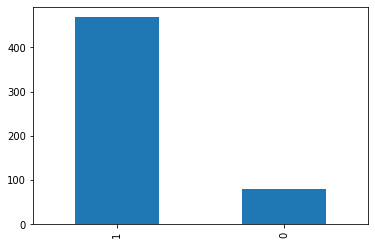

In [341]:
#Sexo dos que morreram
morreu['sexo'].value_counts().plot.bar()

In [342]:
dados['irmaos_ou_esposa_a_bordo'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: irmaos_ou_esposa_a_bordo, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a80c1550>]],
      dtype=object)

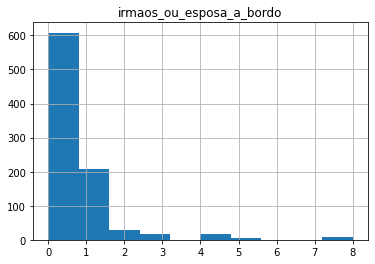

In [343]:
dados.hist('irmaos_ou_esposa_a_bordo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a6c1ded0>]],
      dtype=object)

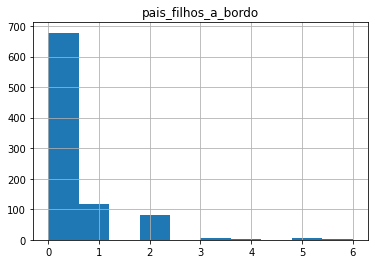

In [344]:
dados.hist('pais_filhos_a_bordo')

In [345]:
import matplotlib.pyplot as plt
import numpy as np

In [352]:
x = dados.drop(columns=['sobrevivente','id_passageiro','nome_passageiro','numero_passagem','id_cabine'])
y = dados['sobrevivente']
x.dropna(inplace=True)

In [353]:
corr = dados.corr()
corr

,id_passageiro,sobrevivente,classe_da_passagem,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,local_de_embarque
id_passageiro,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.016013,-0.030555
sobrevivente,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.185716,0.108669
classe_da_passagem,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.296134,0.043835
sexo,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.092308,-0.118593
idade,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.086456,0.012186
irmaos_ou_esposa_a_bordo,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,-0.028300,-0.060606
pais_filhos_a_bordo,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.045714,-0.079320
valor_passagem,0.016013,0.185716,-0.296134,-0.092308,0.086456,-0.028300,0.045714,1.000000,0.111930
local_de_embarque,-0.030555,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.111930,1.000000


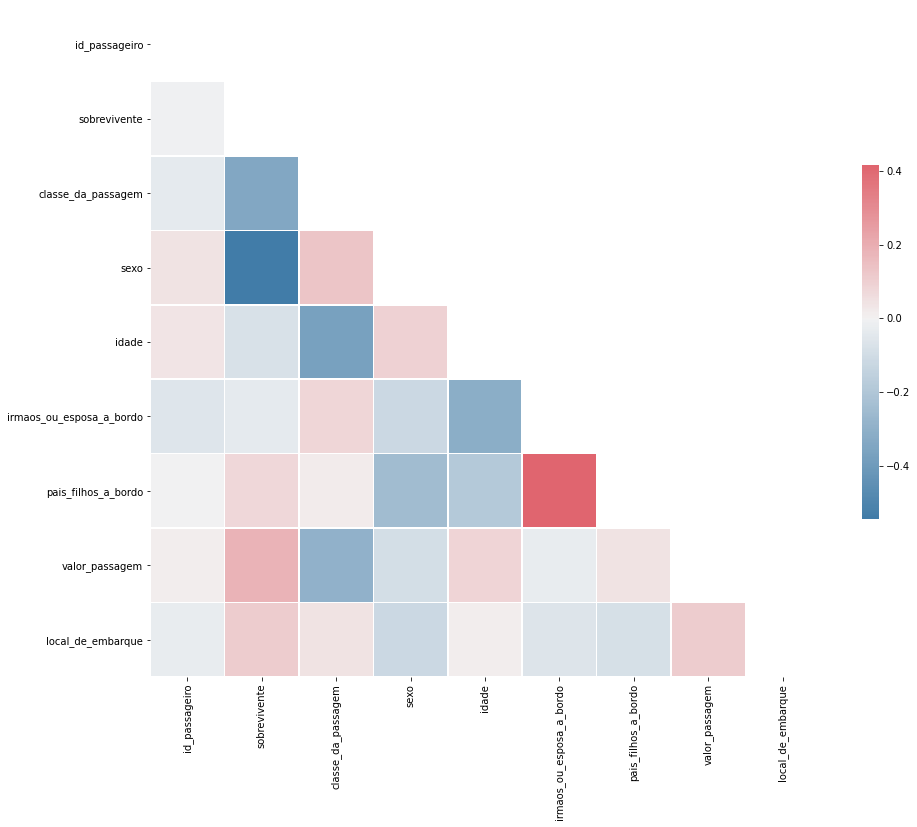

In [354]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [356]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

ValueError: ignored

In [351]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                         test_size = 1/3)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
previsoes_SVC = modelo.predict(X_train)
acuracia = accuracy_score(y_train, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 594 elementos e testaremos com 297 elementos


ValueError: ignored

In [283]:
x

,classe_da_passagem,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,id_cabine,local_de_embarque
0,3,1,22.0,1,0,7.25,NaN,S
1,1,0,38.0,1,0,712833.00,C85,C
2,3,0,26.0,0,0,7925.00,NaN,S
3,1,0,35.0,1,0,53.10,C123,S
4,3,1,35.0,0,0,8.05,NaN,S
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.00,NaN,S
887,1,0,19.0,0,0,30.00,B42,S
888,3,0,NaN,1,2,23.45,NaN,S
889,1,1,26.0,0,0,30.00,C148,C
